In [202]:
import torch 
import matplotlib.pyplot as plt
import math

from sklearn.decomposition import PCA
from sklearn.manifold import MDS

In [334]:
p1 = torch.distributions.Normal(0., 1.)
q1 = torch.distributions.Normal(0., 3.)

p2 = torch.distributions.Normal(1., math.sqrt(1.555))
q2 = torch.distributions.StudentT(5.,1., 1.)

p3 = torch.distributions.Normal(0., 2.)
cat = torch.distributions.Categorical(logits=torch.zeros(2))
q3 = torch.distributions.MixtureSameFamily(cat,torch.distributions.Independent(torch.distributions.Normal(torch.tensor([-3., 3.]),1), 0))

p4 = torch.distributions.Normal(0., 0.5)
cat = torch.distributions.Categorical(logits=1/torch.linspace(-5,5, 10)**2)
q4 = torch.distributions.MixtureSameFamily(cat,torch.distributions.Independent(torch.distributions.Normal(torch.linspace(-4.5,5, 10),0.1), 0))

x = torch.linspace(-10, 10, 100)

C:\Users\manug\AppData\Local\Temp\ipykernel_24380\3323522488.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes["top right"].set_xticklabels(["", r"$p_1$", r"$p_2$",r"$p_3$",r"$p_4$",r"$p_5$",r"$p_6$",r"$p_7$",r"$p_8$"])


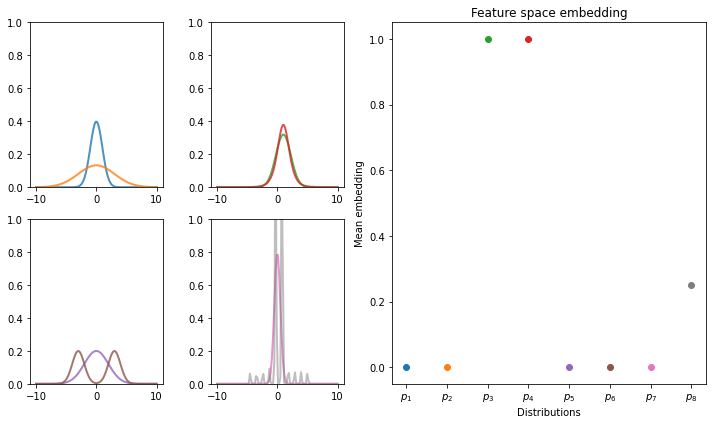

In [323]:
fig, axes = plt.subplot_mosaic(
    [["top left", "top centre", "top right", "top right"],
     ["bottom left", "bottom centre", "top right", "top right"]],
figsize=(10, 6))

axes["top left"].plot(x, p1.log_prob(x).exp(), alpha=0.8, lw=2, color="C0")
axes["top left"].plot(x, q1.log_prob(x).exp(), alpha=0.8, lw=2, color="C1")
axes["top left"].set_ylim(0, 1.)

axes["top centre"].plot(x, p2.log_prob(x).exp(), alpha=0.8, lw=2, color="C2")
axes["top centre"].plot(x, q2.log_prob(x).exp(), alpha=0.8, lw=2, color="C3")
axes["top centre"].set_ylim(0, 1.)

axes["bottom left"].plot(x, p3.log_prob(x).exp(), alpha=0.8, lw=2, color="C4")
axes["bottom left"].plot(x, q3.log_prob(x).exp(), alpha=0.8, lw=2, color="C5")
axes["bottom left"].set_ylim(0, 1.)

axes["bottom centre"].plot(x, p4.log_prob(x).exp(), alpha=0.8, lw=2, color="C6")
axes["bottom centre"].plot(x, q4.log_prob(x).exp(), alpha=0.5, lw=2, color="C7")
axes["bottom centre"].set_ylim(0, 1.)

means = [p1.mean, q1.mean, p2.mean, q2.mean, p3.mean, q3.mean, p4.mean, q4.mean]
for i,m in enumerate(means):
    #axes["top right"].vlines(i+1,0,m, color="C"+str(i))
    axes["top right"].scatter(i+1, m)

axes["top right"].set_xlabel("Distributions")
axes["top right"].set_xticklabels(["", r"$p_1$", r"$p_2$",r"$p_3$",r"$p_4$",r"$p_5$",r"$p_6$",r"$p_7$",r"$p_8$"])
axes["top right"].set_ylabel("Mean embedding")
axes["top right"].set_title("Feature space embedding")
#axes["top right"].legend([r"$p_1$", r"$p_2$",r"$p_3$",r"$p_4$",r"$p_5$",r"$p_6$",r"$p_7$",r"$p_8$"])

plt.tight_layout()

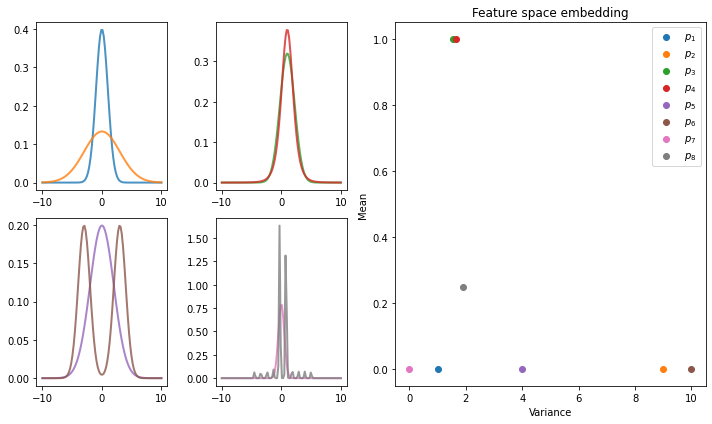

In [327]:
fig, axes = plt.subplot_mosaic(
    [["top left", "top centre", "top right", "top right"],
     ["bottom left", "bottom centre", "top right", "top right"]],
figsize=(10, 6))

axes["top left"].plot(x, p1.log_prob(x).exp(), alpha=0.8, lw=2, color="C0")
axes["top left"].plot(x, q1.log_prob(x).exp(), alpha=0.8, lw=2, color="C1")

axes["top centre"].plot(x, p2.log_prob(x).exp(), alpha=0.8, lw=2, color="C2")
axes["top centre"].plot(x, q2.log_prob(x).exp(), alpha=0.8, lw=2, color="C3")

axes["bottom left"].plot(x, p3.log_prob(x).exp(), alpha=0.8, lw=2, color="C4")
axes["bottom left"].plot(x, q3.log_prob(x).exp(), alpha=0.8, lw=2, color="C5")

axes["bottom centre"].plot(x, p4.log_prob(x).exp(), alpha=0.8, lw=2, color="C6")
axes["bottom centre"].plot(x, q4.log_prob(x).exp(), alpha=0.8, lw=2, color="C7")

means = [p1.mean, q1.mean, p2.mean, q2.mean, p3.mean, q3.mean, p4.mean, q4.mean]
vars = [p1.variance, q1.variance, p2.variance, q2.variance, p3.variance, q3.variance, p4.mean, q4.variance]
for m,v in zip(means,vars):
    axes["top right"].scatter(v + torch.randn((1,))*0.001, m + torch.randn((1,))*0.001)

axes["top right"].set_xlabel("Variance")
axes["top right"].set_ylabel("Mean")
axes["top right"].set_title("Feature space embedding")
axes["top right"].legend([r"$p_1$", r"$p_2$",r"$p_3$",r"$p_4$",r"$p_5$",r"$p_6$",r"$p_7$",r"$p_8$"])

plt.tight_layout()

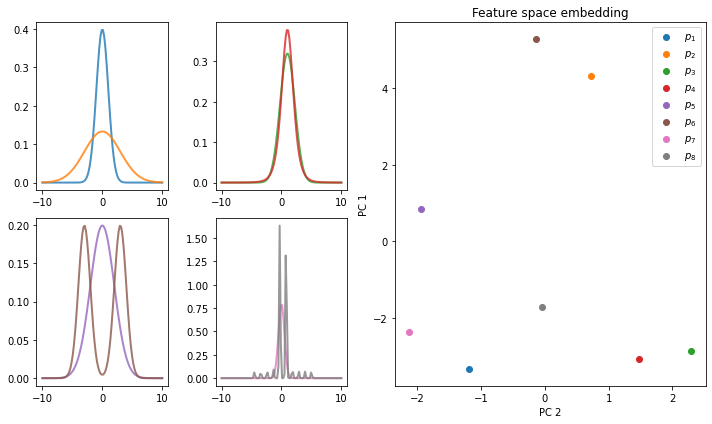

In [329]:
fig, axes = plt.subplot_mosaic(
    [["top left", "top centre", "top right", "top right"],
     ["bottom left", "bottom centre", "top right", "top right"]],
figsize=(10, 6))

axes["top left"].plot(x, p1.log_prob(x).exp(), alpha=0.8, lw=2, color="C0")
axes["top left"].plot(x, q1.log_prob(x).exp(), alpha=0.8, lw=2, color="C1")

axes["top centre"].plot(x, p2.log_prob(x).exp(), alpha=0.8, lw=2, color="C2")
axes["top centre"].plot(x, q2.log_prob(x).exp(), alpha=0.8, lw=2, color="C3")

axes["bottom left"].plot(x, p3.log_prob(x).exp(), alpha=0.8, lw=2, color="C4")
axes["bottom left"].plot(x, q3.log_prob(x).exp(), alpha=0.8, lw=2, color="C5")

axes["bottom centre"].plot(x, p4.log_prob(x).exp(), alpha=0.8, lw=2, color="C6")
axes["bottom centre"].plot(x, q4.log_prob(x).exp(), alpha=0.8, lw=2, color="C7")

ps = [p1, q1, p2,q2, p3,q3, p4,q4]
N = 4
moments_ps = []
for p in ps:
    samples = p.sample((1000000,))
    moments =torch.vstack([torch.mean(samples**i) for i in range(1,N)])
    moments_ps.append(moments)
    
pca = PCA(n_components=2)
xs = pca.fit_transform(torch.hstack(moments_ps).T.numpy())

for m,v in zip(xs[:,0],xs[:,1]):
    axes["top right"].scatter(v + torch.randn((1,)), m + torch.randn((1,)))

axes["top right"].set_xlabel("PC 2")
axes["top right"].set_ylabel("PC 1")
axes["top right"].set_title("Feature space embedding")
axes["top right"].legend([r"$p_1$", r"$p_2$",r"$p_3$",r"$p_4$",r"$p_5$",r"$p_6$",r"$p_7$",r"$p_8$"])

plt.tight_layout()

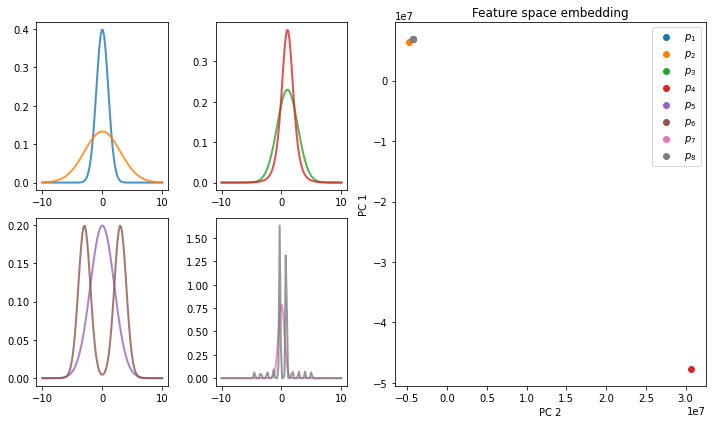

In [285]:
fig, axes = plt.subplot_mosaic(
    [["top left", "top centre", "top right", "top right"],
     ["bottom left", "bottom centre", "top right", "top right"]],
figsize=(10, 6))

axes["top left"].plot(x, p1.log_prob(x).exp(), alpha=0.8, lw=2, color="C0")
axes["top left"].plot(x, q1.log_prob(x).exp(), alpha=0.8, lw=2, color="C1")

axes["top centre"].plot(x, p2.log_prob(x).exp(), alpha=0.8, lw=2, color="C2")
axes["top centre"].plot(x, q2.log_prob(x).exp(), alpha=0.8, lw=2, color="C3")

axes["bottom left"].plot(x, p3.log_prob(x).exp(), alpha=0.8, lw=2, color="C4")
axes["bottom left"].plot(x, q3.log_prob(x).exp(), alpha=0.8, lw=2, color="C5")

axes["bottom centre"].plot(x, p4.log_prob(x).exp(), alpha=0.8, lw=2, color="C6")
axes["bottom centre"].plot(x, q4.log_prob(x).exp(), alpha=0.8, lw=2, color="C7")

ps = [p1, q1, p2,q2, p3,q3, p4,q4]
N = 10
moments_ps = []
for p in ps:
    moments = [p.mean, p.variance]
    samples = (p.sample((1000000,)) - p.mean)
    moments += [torch.mean(samples**i) for i in range(3,N)]
    moments_ps.append(torch.vstack(moments))


X = torch.hstack(moments_ps).T
pca = MDS(n_components=2)
xs = pca.fit_transform(X.numpy())

for m,v in zip(xs[:,0],xs[:,1]):
    axes["top right"].scatter(v + torch.randn((1,))*0.001, m + torch.randn((1,))*0.001)
    i+=1
axes["top right"].set_xlabel("PC 2")
axes["top right"].set_ylabel("PC 1")
axes["top right"].set_title("Feature space embedding")
axes["top right"].legend([r"$p_1$", r"$p_2$",r"$p_3$",r"$p_4$",r"$p_5$",r"$p_6$",r"$p_7$",r"$p_8$"])

plt.tight_layout()